In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from googleapiclient.discovery import build
from dotenv import load_dotenv
from channel_ID import CHANNEL_ID

import warnings
warnings.filterwarnings('ignore')

In [2]:
## load enviroment variables from the .env files
load_dotenv()

True

In [3]:
## get the api key from the .env file
api_key = os.getenv("api_key")

In [4]:
## create a youtube api client
youtube = build('youtube', 'v3', developerKey=api_key)

In [5]:
## function to fetch the channel data for a given channel id and youtube api key

def channel_data(api_key, channel_id):
    all_data = []

    request = youtube.channels().list(
        part = 'snippet, contentDetails, statistics',
        id = ','.join(channel_id)
    )
    response = request.execute()
    for i in range(len(response['items'])):
        data = dict(channel_title = response['items'][i]['snippet']['title'],
                    created_date = response['items'][i]['snippet']['publishedAt'],
                    subscribers = response['items'][i]['statistics']['subscriberCount'],
                    total_videos = response['items'][i]['statistics']['videoCount'],
                    total_views = response['items'][i]['statistics']['viewCount'],
                    playlist_id = response['items'][i]['contentDetails']['relatedPlaylists']['uploads'])
        
        all_data.append(data)

    return all_data

In [6]:
## Calling the function to get the channel data and store it in a variable

channel_stat = channel_data(api_key,CHANNEL_ID)

channel_stat


[{'channel_title': 'Data Professor',
  'created_date': '2019-08-17T15:59:56Z',
  'subscribers': '211000',
  'total_videos': '357',
  'total_views': '7666911',
  'playlist_id': 'UUV8e2g4IWQqK71bbzGDEI4Q'},
 {'channel_title': 'sentdex',
  'created_date': '2012-12-16T20:49:11Z',
  'subscribers': '1420000',
  'total_videos': '1263',
  'total_views': '118309097',
  'playlist_id': 'UUfzlCWGWYyIQ0aLC5w48gBQ'},
 {'channel_title': 'CS Dojo',
  'created_date': '2016-02-26T01:49:30Z',
  'subscribers': '1950000',
  'total_videos': '112',
  'total_views': '83879881',
  'playlist_id': 'UUxX9wt5FWQUAAz4UrysqK9A'},
 {'channel_title': 'Corey Schafer',
  'created_date': '2006-05-31T22:49:22Z',
  'subscribers': '1460000',
  'total_videos': '246',
  'total_views': '103510231',
  'playlist_id': 'UUCezIgC97PvUuR4_gbFUs5g'},
 {'channel_title': 'Two Minute Papers',
  'created_date': '2006-08-18T00:05:41Z',
  'subscribers': '1660000',
  'total_videos': '990',
  'total_views': '153724481',
  'playlist_id': 'UUb

In [7]:
## Coverting the channel data to a pandas dataframe

channel_stat_df = pd.DataFrame(channel_stat)

In [8]:
## checking the first five rows of the datafrmae
channel_stat_df.head()

,channel_title,created_date,subscribers,total_videos,total_views,playlist_id
0,Data Professor,2019-08-17T15:59:56Z,211000,357,7666911,UUV8e2g4IWQqK71bbzGDEI4Q
1,sentdex,2012-12-16T20:49:11Z,1420000,1263,118309097,UUfzlCWGWYyIQ0aLC5w48gBQ
2,CS Dojo,2016-02-26T01:49:30Z,1950000,112,83879881,UUxX9wt5FWQUAAz4UrysqK9A
3,Corey Schafer,2006-05-31T22:49:22Z,1460000,246,103510231,UUCezIgC97PvUuR4_gbFUs5g
4,Two Minute Papers,2006-08-18T00:05:41Z,1660000,990,153724481,UUbfYPyITQ-7l4upoX8nvctg


In [9]:
## checking the infomations of the columns

channel_stat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   channel_title  15 non-null     object
 1   created_date   15 non-null     object
 2   subscribers    15 non-null     object
 3   total_videos   15 non-null     object
 4   total_views    15 non-null     object
 5   playlist_id    15 non-null     object
dtypes: object(6)
memory usage: 848.0+ bytes


In [10]:
channel_stat_df['created_date'].head()

0    2019-08-17T15:59:56Z
1    2012-12-16T20:49:11Z
2    2016-02-26T01:49:30Z
3    2006-05-31T22:49:22Z
4    2006-08-18T00:05:41Z
Name: created_date, dtype: object

In [11]:
## changing the date column to datetime format

## Dates are in ISO8601 format (like "2022-09-14T07:54:45.021008Z")
## "2022-09-14T07:54:45.021008Z" includes fractional seconds (.021008) and a "Z" to indicate UTC.

channel_stat_df['created_date'] = pd.to_datetime(channel_stat_df['created_date'], format='ISO8601').dt.date

In [12]:
channel_stat_df.head()

,channel_title,created_date,subscribers,total_videos,total_views,playlist_id
0,Data Professor,2019-08-17,211000,357,7666911,UUV8e2g4IWQqK71bbzGDEI4Q
1,sentdex,2012-12-16,1420000,1263,118309097,UUfzlCWGWYyIQ0aLC5w48gBQ
2,CS Dojo,2016-02-26,1950000,112,83879881,UUxX9wt5FWQUAAz4UrysqK9A
3,Corey Schafer,2006-05-31,1460000,246,103510231,UUCezIgC97PvUuR4_gbFUs5g
4,Two Minute Papers,2006-08-18,1660000,990,153724481,UUbfYPyITQ-7l4upoX8nvctg


In [13]:
## Converting the subscriber, total_videos and total_views columns to integer data type

channel_stat_df['subscribers'] = channel_stat_df['subscribers'].astype(int)
channel_stat_df['total_videos'] = channel_stat_df['total_videos'].astype(int)
channel_stat_df['total_views'] = channel_stat_df['total_views'].astype(int)

In [14]:
## Creating a new column year to store the year of the channel creation 

channel_stat_df['year'] = pd.to_datetime(channel_stat_df['created_date']).dt.year

In [15]:
numerical_data = channel_stat_df[['subscribers','total_videos','total_views','year']]

correlation = numerical_data.corr()
correlation

,subscribers,total_videos,total_views,year
subscribers,1.000000,0.414642,0.980905,-0.014536
total_videos,0.414642,1.000000,0.411505,-0.266770
total_views,0.980905,0.411505,1.000000,0.038880
year,-0.014536,-0.266770,0.038880,1.000000


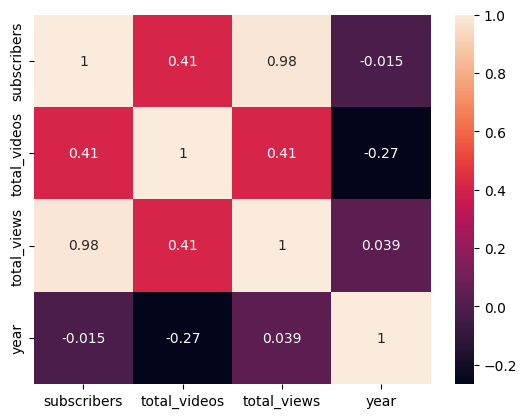

In [16]:
sns.heatmap(correlation, annot=True)
plt.show()

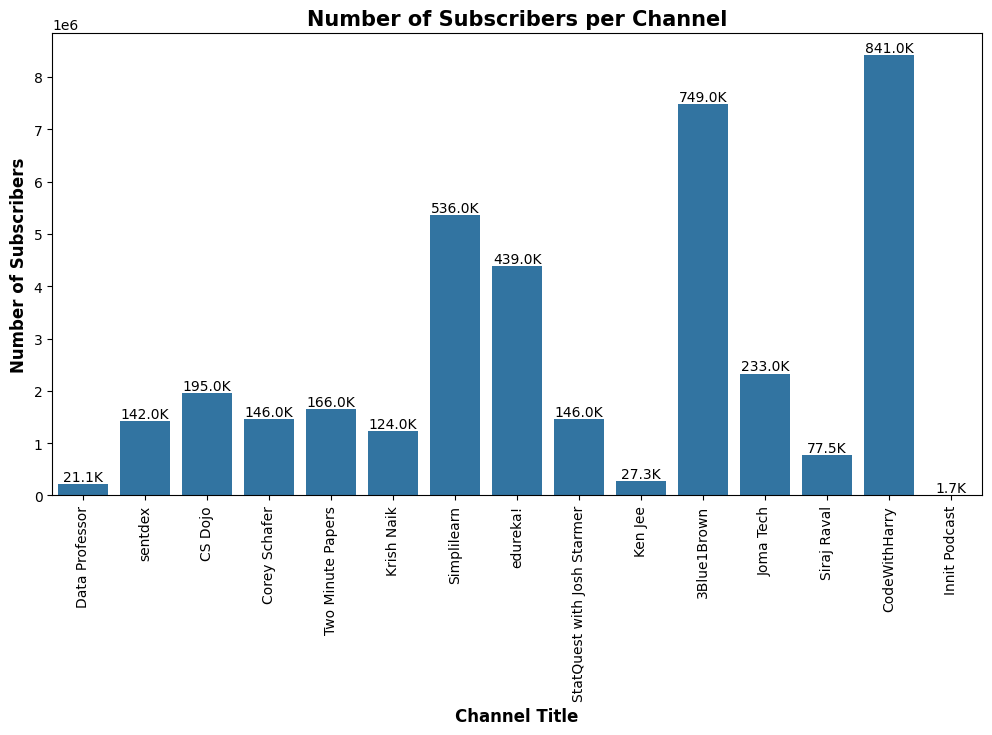

In [17]:
## number of subecribers per channel

plt.figure(figsize=(12,6))
ax = sns.barplot(x='channel_title', y='subscribers', data=channel_stat_df)
for p in ax.patches:
    label = f'{p.get_height() / 10000:.1f}K'
    ax.annotate(label, 
                (p.get_x()+ p.get_width()/2., p.get_height()), ha='center', 
                va='center', xytext=(0,5), textcoords='offset points')

plt.xticks(rotation=90)
plt.title('Number of Subscribers per Channel', fontsize=15, fontweight='bold')
plt.xlabel('Channel Title', fontsize=12, fontweight='bold')
plt.ylabel('Number of Subscribers', fontsize=12, fontweight='bold')
plt.show()

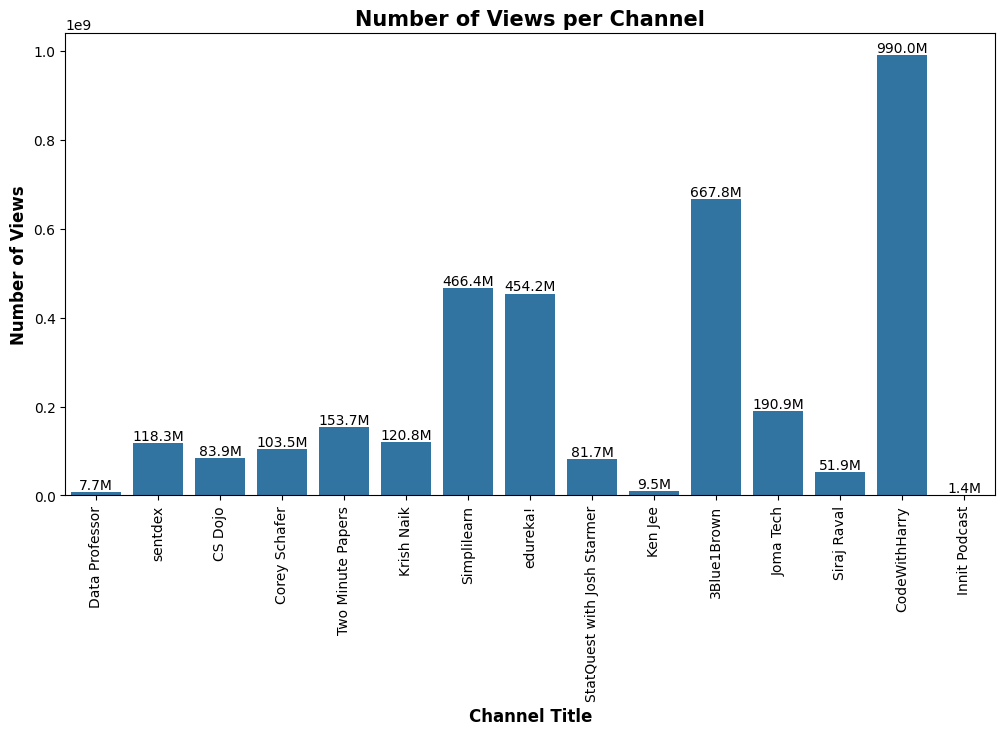

In [18]:
 ## Number of views per channel

plt.figure(figsize=(12,6))
ax = sns.barplot(x='channel_title', y='total_views', data=channel_stat_df)
for p in ax.patches:
    label = f'{p.get_height() / 1000000:.1f}M'
    ax.annotate(label, 
                (p.get_x()+ p.get_width()/2., p.get_height()), ha='center', 
                va='center', xytext=(0,5), textcoords='offset points')

plt.xticks(rotation=90)
plt.title('Number of Views per Channel', fontsize=15, fontweight='bold')
plt.xlabel('Channel Title', fontsize=12, fontweight='bold')
plt.ylabel('Number of Views', fontsize=12, fontweight='bold')
plt.show()

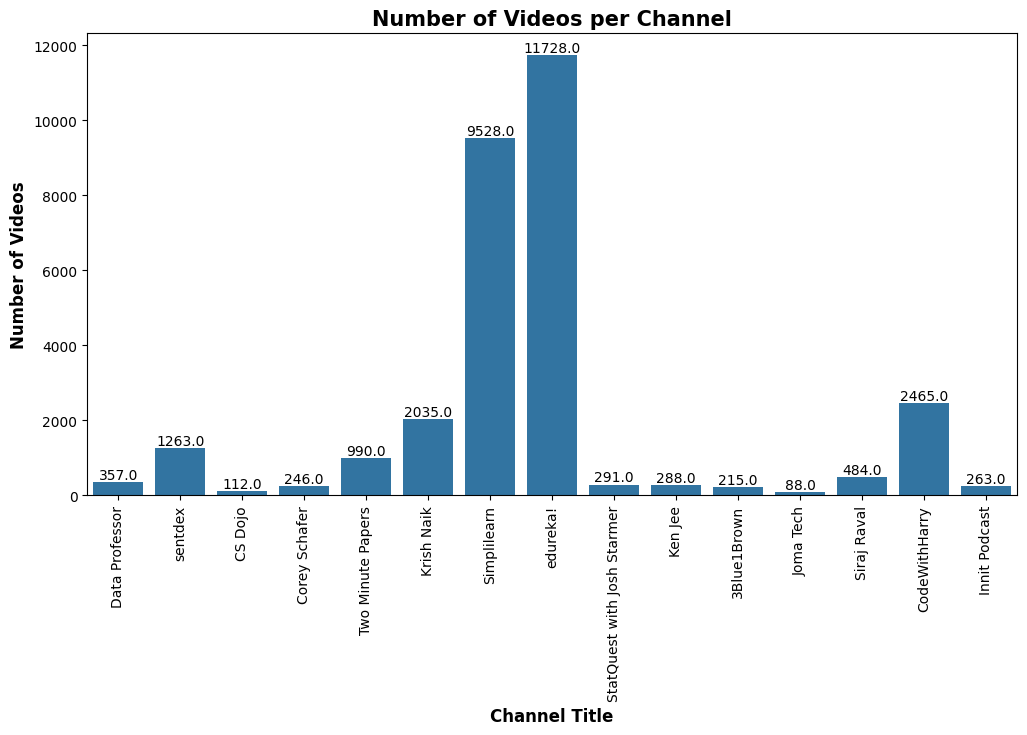

In [19]:
## number of videos per channel

plt.figure(figsize=(12,6))
ax = sns.barplot(x='channel_title', y='total_videos', data=channel_stat_df)
for p in ax.patches:
    label = f'{p.get_height()}'
    ax.annotate(label, 
                (p.get_x()+ p.get_width()/2., p.get_height()), ha='center', 
                va='center', xytext=(0,5), textcoords='offset points')

plt.xticks(rotation=90)
plt.title('Number of Videos per Channel', fontsize=15, fontweight='bold')
plt.xlabel('Channel Title', fontsize=12, fontweight='bold')
plt.ylabel('Number of Videos', fontsize=12, fontweight='bold')  
plt.show()  


In [20]:
channel_stat_df.head()

,channel_title,created_date,subscribers,total_videos,total_views,playlist_id,year
0,Data Professor,2019-08-17,211000,357,7666911,UUV8e2g4IWQqK71bbzGDEI4Q,2019
1,sentdex,2012-12-16,1420000,1263,118309097,UUfzlCWGWYyIQ0aLC5w48gBQ,2012
2,CS Dojo,2016-02-26,1950000,112,83879881,UUxX9wt5FWQUAAz4UrysqK9A,2016
3,Corey Schafer,2006-05-31,1460000,246,103510231,UUCezIgC97PvUuR4_gbFUs5g,2006
4,Two Minute Papers,2006-08-18,1660000,990,153724481,UUbfYPyITQ-7l4upoX8nvctg,2006


In [21]:
harry = channel_stat_df['channel_title'] == "CodeWithHarry"

In [22]:
playlist_id = channel_stat_df[harry]['playlist_id'].iloc[0]

playlist_id

'UUeVMnSShP_Iviwkknt83cww'

In [23]:
def get_video_id(youtube, playlist_id):
    """
    Extracts all video IDs from a given YouTube playlist.

    Args:
        youtube: An authorized YouTube API client instance.
        playlist_id: The ID of the playlist from which to extract video IDs.

    Returns:
        A list of video IDs in the playlist.
    """
    video_id = []
    next_page_token = None

    while True:
        # Request the playlist items with optional next_page_token
        request = youtube.playlistItems().list(
            part='contentDetails',
            playlistId=playlist_id,
            maxResults=50,
            pageToken=next_page_token
        )
        response = request.execute()

        # Append video IDs to the list
        video_id.extend(item['contentDetails']['videoId'] for item in response['items'])

        # Check for next page token
        next_page_token = response.get('nextPageToken')
        if not next_page_token:
            break

    return video_id


In [24]:
## create a youtube api client
youtube = build('youtube', 'v3', developerKey=api_key)

In [25]:
video_ids = get_video_id(youtube, playlist_id)

In [26]:
def get_video_details(youtube, video_ids):
    """
    Extracts details (title, published date, views, likes, and comments) from a list of video IDs.

    Args:
        youtube: An authorized YouTube API client instance.
        video_ids: A list of video IDs to retrieve details for.

    Returns:
        A list of dictionaries containing details for each video.
    """
    all_data = []
    # YouTube API allows fetching details for up to 50 videos at a time
    batch_size = 50

    for i in range(0, len(video_ids), batch_size):
        # Batch the video IDs for the current API request
        batch_ids = video_ids[i:i + batch_size]

        request = youtube.videos().list(
            part='snippet,statistics',
            id=','.join(batch_ids)  # Join video IDs as a comma-separated string
        )
        response = request.execute()

        for item in response.get('items', []):  # Safely handle cases where 'items' might be missing
            data = {
                'video_id': item['id'],
                'title': item['snippet']['title'],
                'published_date': item['snippet']['publishedAt'],
                'views': item['statistics'].get('viewCount', 0),
                'likes': item['statistics'].get('likeCount', 0),
                'comments': item['statistics'].get('commentCount', 0)
            }
            all_data.append(data)

    return all_data


In [27]:
video_details = get_video_details(youtube, video_ids)

In [28]:
## Converting the video details to a pandas dataframe

video_details_df = pd.DataFrame(video_details)

In [29]:
video_details_df.head()

,video_id,title,published_date,views,likes,comments
0,yE6tIle64tU,SQL Tutorial for Beginners (Complete Course us...,2025-07-13T15:48:18Z,356979,13542,1488
1,CF52N-w4anI,Your First Programming Language in the AI Era ...,2025-07-05T11:30:20Z,575050,21629,1775
2,b7ttYWrJzCI,You can do much more with AI 🔥,2025-07-03T13:30:28Z,138671,6718,412
3,t1h5vHJ0mCQ,AI & Machine Learning Roadmap (No Fluff),2025-06-22T06:18:43Z,350063,15096,1185
4,u0aYTqXj_1I,The Shocking History of AI and Machine Learnin...,2025-06-14T15:43:44Z,158854,5874,516


In [30]:
video_details_df.shape

(2466, 6)

In [31]:
video_details_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2466 entries, 0 to 2465
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   video_id        2466 non-null   object
 1   title           2466 non-null   object
 2   published_date  2466 non-null   object
 3   views           2466 non-null   object
 4   likes           2466 non-null   object
 5   comments        2466 non-null   object
dtypes: object(6)
memory usage: 115.7+ KB


In [32]:
video_details_df = video_details_df.astype({'views': int, 'likes': int, 'comments': int})

In [33]:
video_details_df.describe()

,views,likes,comments
count,2.466000e+03,2466.000000,2466.000000
mean,4.014700e+05,13917.347121,924.491890
std,1.004055e+06,28615.775662,3727.490469
min,0.000000e+00,0.000000,0.000000
25%,7.028050e+04,2328.750000,145.250000
50%,1.654940e+05,5825.500000,306.500000
75%,3.795672e+05,14099.750000,708.750000
max,2.470913e+07,638413.000000,122983.000000


In [34]:
video_details_df.isnull().sum()

video_id          0
title             0
published_date    0
views             0
likes             0
comments          0
dtype: int64

In [35]:
# 'published_date' is in datetime format
video_details_df['published_date'] = pd.to_datetime(video_details_df['published_date'], errors='coerce')

In [36]:
video_details_df.head()

,video_id,title,published_date,views,likes,comments
0,yE6tIle64tU,SQL Tutorial for Beginners (Complete Course us...,2025-07-13 15:48:18+00:00,356979,13542,1488
1,CF52N-w4anI,Your First Programming Language in the AI Era ...,2025-07-05 11:30:20+00:00,575050,21629,1775
2,b7ttYWrJzCI,You can do much more with AI 🔥,2025-07-03 13:30:28+00:00,138671,6718,412
3,t1h5vHJ0mCQ,AI & Machine Learning Roadmap (No Fluff),2025-06-22 06:18:43+00:00,350063,15096,1185
4,u0aYTqXj_1I,The Shocking History of AI and Machine Learnin...,2025-06-14 15:43:44+00:00,158854,5874,516


In [37]:
## average number of views, likes, and comments per video

average_views = video_details_df['views'].mean()
average_likes = video_details_df['likes'].mean()
average_comments = video_details_df['comments'].mean()

In [38]:
print(f"Average Views: {average_views:.2f}")
print(f"Average Likes: {average_likes:.2f}")
print(f"Average Comments: {average_comments:.2f}")


Average Views: 401470.05
Average Likes: 13917.35
Average Comments: 924.49


In [39]:
## Average number of views, likes, and comments per video in 2024
# Filter videos published in 2024
filter_2024 = video_details_df[video_details_df['published_date'].dt.year == 2024]
filter_2024

,video_id,title,published_date,views,likes,comments
47,mXZb9NytbmI,CodeWithHarry 2024 Rewind 🔥,2024-12-29 11:30:33+00:00,59805,4975,864
48,9ja99LqXQLg,Upcoming Products (Google Insider Reveals),2024-12-29 05:30:04+00:00,59088,2717,18
49,Jl4Mv3mwVX0,Security & Google 🔥,2024-12-27 12:01:05+00:00,143291,8593,47
50,WXqOc-oor-E,Two Weeks is what it takes...,2024-12-25 12:48:27+00:00,231420,15655,769
51,1XuyLPkFlZo,"Why use Google Workspace ft. Prakash, India Le...",2024-12-23 12:32:09+00:00,67701,2474,35
...,...,...,...,...,...,...
230,SksvlZM-5Sk,"Response, Request and Routers in Express | Sig...",2024-01-05 14:57:21+00:00,141264,4250,376
231,R11tvGM3nDY,Introduction to Express Js | Sigma Web Develop...,2024-01-05 04:30:07+00:00,163372,5296,731
232,C8qEifIlH_k,"🤑₹3,30,000 New Year Gift for Myself - Lifesty...",2024-01-03 12:56:18+00:00,247281,9716,974
233,BTcmvrCTyNg,Working with Files: fs and path Modules | Sigm...,2024-01-03 04:30:03+00:00,123431,4199,282


In [40]:
# Calculate averages for views, likes, and comments
average_views = filter_2024['views'].astype(int).mean()
average_likes = filter_2024['likes'].astype(int).mean()
average_comments = filter_2024['comments'].astype(int).mean()

In [41]:
# Display the results
print(f"Average Views per Video in 2024: {average_views}")
print(f"Average Likes per Video in 2024: {average_likes}")
print(f"Average Comments per Video in 2024: {average_comments}")

Average Views per Video in 2024: 329799.829787234
Average Likes per Video in 2024: 12026.08510638298
Average Comments per Video in 2024: 884.0478723404256


In [42]:
### Top 10 viedos in the channel
top10_videos = video_details_df.sort_values(by='views',
                                            ascending=False).head(10)

In [43]:
top10_videos

,video_id,title,published_date,views,likes,comments
1425,gfDE2a7MKjA,Python Tutorial For Beginners In Hindi (With N...,2020-09-24 11:34:17+00:00,24709129,638413,122983
1532,ZSPZob_1TOk,C Language Tutorial For Beginners In Hindi (Wi...,2020-07-28 11:30:03+00:00,18372513,419236,76898
1266,BsDoLVMnmZs,HTML Tutorial For Beginners In Hindi (With Not...,2021-03-17 02:55:23+00:00,14111989,343934,29510
125,UrsmFxEIp5k,Python Tutorial For Beginners in Hindi | Compl...,2024-06-16 05:36:24+00:00,11342120,249243,33182
1474,ntLJmHOJ0ME,Introduction to Java + Installing Java JDK and...,2020-08-30 16:01:22+00:00,10548848,180677,22628
618,7wnove7K-ZQ,Introduction to Programming & Python | Python ...,2022-11-28 11:30:03+00:00,9701506,232242,29978
1828,6mbwJ2xhgzM,"Introduction to HTML, CSS, JavaScript & How we...",2019-12-25 08:12:47+00:00,8445970,215182,17015
1791,j8nAHeVKL08,"Introduction to C++, Installing VS Code, g++ &...",2020-01-11 13:51:01+00:00,7750233,154264,16396
1619,hKB-YGF14SY,JavaScript Tutorial In Hindi,2020-05-16 17:57:42+00:00,7211988,200014,24918
1258,Edsxf_NBFrw,CSS Tutorial In Hindi (With Notes) 🔥,2021-04-27 18:39:49+00:00,7067338,136620,17176


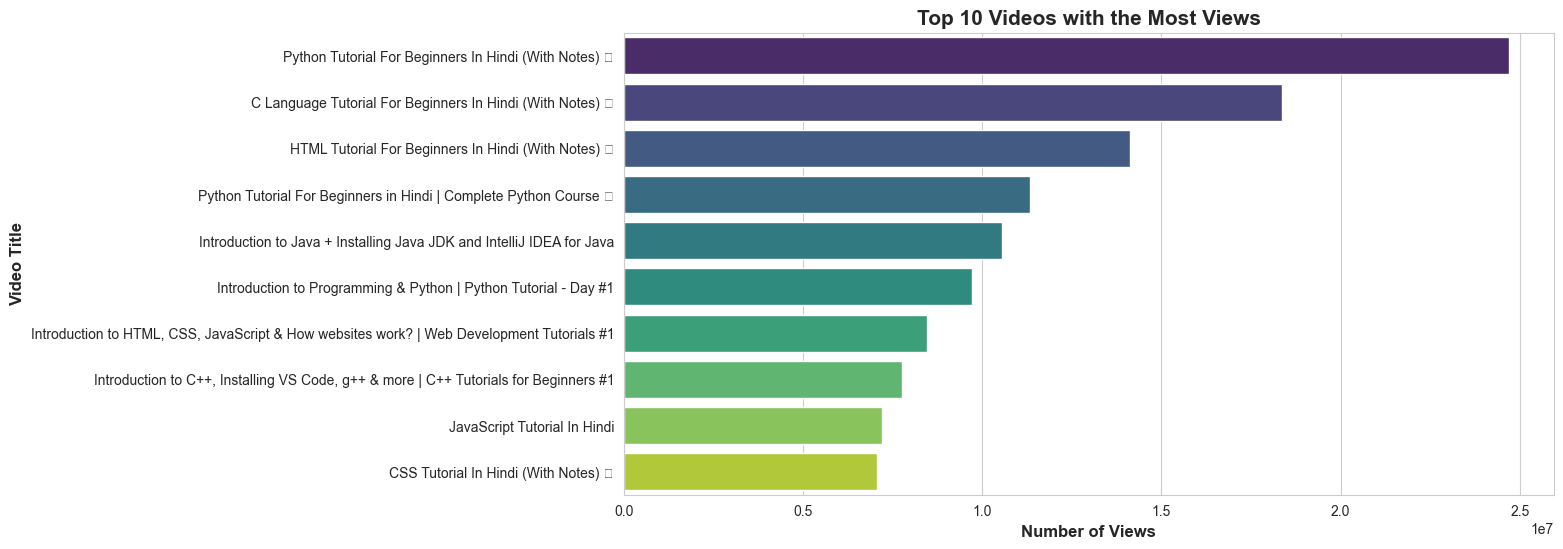

In [44]:
## Plotting the top 10 videos with the most views
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
ax = sns.barplot(x='views', y='title', data=top10_videos, palette='viridis')
plt.title('Top 10 Videos with the Most Views', fontsize=15, fontweight='bold')
plt.xlabel('Number of Views', fontsize=12, fontweight='bold')
plt.ylabel('Video Title', fontsize=12, fontweight='bold')
plt.show()


In [45]:
## number of videos have more than 1M views
num_videos_1m = video_details_df[video_details_df['views'] > 1000000].shape[0]
num_videos_1m

211

In [46]:
## number of videos have more than 1M views in 2024
num_videos_1m_2024 = filter_2024[filter_2024['views'] > 1000000].shape[0]
num_videos_1m_2024

11

In [47]:
# Percentage of videos with more than 1M views
percentage_1m = num_videos_1m / video_details_df.shape[0] * 100
percentage_1m


8.556366585563666

In [48]:
## Percentage of videos with more than 1M views in 2024
percentage_1m_2024 = num_videos_1m_2024 / filter_2024.shape[0] * 100    
percentage_1m_2024

5.851063829787234

In [49]:
## number of videos have been posted per month
video_details_df['month'] = video_details_df['published_date'].dt.month


In [50]:
video_per_month = video_details_df['month'].value_counts().sort_index()
video_per_month

month
1     262
2     213
3     134
4     174
5     173
6     187
7     158
8     251
9     237
10    244
11    183
12    250
Name: count, dtype: int64

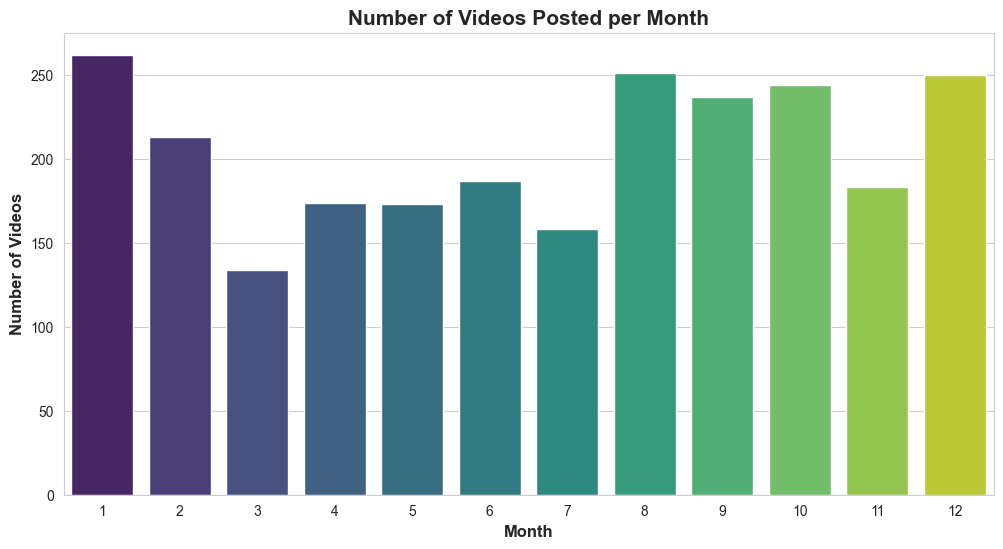

In [51]:
## Plotting the number of videos posted per month
plt.figure(figsize=(12,6))
sns.countplot(x='month', data=video_details_df, palette='viridis')
plt.title('Number of Videos Posted per Month', fontsize=15, fontweight='bold')
plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.ylabel('Number of Videos', fontsize=12, fontweight='bold')
plt.show()
